In [1]:
# Jodie Sun -- 06 HW API -- Part I

# Observations: 
# As latitude gets closer to the equator, the temperature gets higher
# The Northern hemisphere is colder than the Southern hemisphere which is true because the Northern hemisphere is going into winter and the Southern hemisphere is going into summer
# Latitude has no relationship with cloudiness and wind speed

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import scipy.stats as st

In [2]:
from api_keys import weather_api_key

In [4]:
from citipy import citipy

In [7]:
# set lat and lng ranges

lat_range = (-90, 90)
lng_range = (-180, 180)


In [8]:
# make random lat and lng values and zip together: 

lat_lngs = []
cities = []

lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# match city names with these random lat & lng
# make my city list

for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    if city not in cities:
        cities.append(city)
        
#check city list length (raw list)
len(cities)
    

617

In [9]:
# set the Open weather url

url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"

In [14]:
query_url = f"{url}appid={weather_api_key}&units={units}&q="


In [15]:
# set a response list that holds all my API results 
resp_obj=[]

In [16]:
# check each city in my random city list, add data into my response list: 
for city in cities:
    response = requests.get(query_url + city).json()
    resp_obj.append(response)

In [47]:
# check the length of my response list
len(resp_obj)

617

In [51]:
resp_obj

[{'coord': {'lon': -57.56, 'lat': -38},
  'weather': [{'id': 804,
    'main': 'Clouds',
    'description': 'overcast clouds',
    'icon': '04n'}],
  'base': 'stations',
  'main': {'temp': 15.3,
   'feels_like': 15.2,
   'temp_min': 15,
   'temp_max': 16.11,
   'pressure': 1014,
   'humidity': 100},
  'visibility': 10000,
  'wind': {'speed': 2.6, 'deg': 70},
  'clouds': {'all': 90},
  'dt': 1603589851,
  'sys': {'type': 1,
   'id': 8305,
   'country': 'AR',
   'sunrise': 1603529504,
   'sunset': 1603577803},
  'timezone': -10800,
  'id': 3430863,
  'name': 'Mar del Plata',
  'cod': 200},
 {'coord': {'lon': -128.65, 'lat': 54.05},
  'weather': [{'id': 501,
    'main': 'Rain',
    'description': 'moderate rain',
    'icon': '10n'}],
  'base': 'stations',
  'main': {'temp': 1.67,
   'feels_like': -2.65,
   'temp_min': 1.67,
   'temp_max': 1.67,
   'pressure': 1035,
   'humidity': 53},
  'visibility': 10000,
  'wind': {'speed': 2.18, 'deg': 53},
  'rain': {'1h': 1.02},
  'clouds': {'all': 0

In [40]:
# now make a raw data dataframe, and show all columns

In [ ]:
# note that this data is not organized / cleaned yet
# note that I export my cleaned data to CSV at the end

In [53]:
cities_df = pd.json_normalize(resp_obj)
pd.set_option('display.max_columns', None)
cities_df.head()

,weather,base,visibility,dt,timezone,id,name,cod,coord.lon,coord.lat,main.temp,main.feels_like,main.temp_min,main.temp_max,main.pressure,main.humidity,wind.speed,wind.deg,clouds.all,sys.type,sys.id,sys.country,sys.sunrise,sys.sunset,rain.1h,message,main.sea_level,main.grnd_level,wind.gust,snow.1h
0,"[{'id': 804, 'main': 'Clouds', 'description': ...",stations,10000.0,1.603590e+09,-10800.0,3430863.0,Mar del Plata,200,-57.56,-38.00,15.30,15.20,15.00,16.11,1014.0,100.0,2.60,70.0,90.0,1.0,8305.0,AR,1.603530e+09,1.603578e+09,NaN,NaN,NaN,NaN,NaN,NaN
1,"[{'id': 501, 'main': 'Rain', 'description': 'm...",stations,10000.0,1.603590e+09,-25200.0,5993072.0,Kitimat,200,-128.65,54.05,1.67,-2.65,1.67,1.67,1035.0,53.0,2.18,53.0,0.0,3.0,2004800.0,CA,1.603553e+09,1.603589e+09,1.02,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,404,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,city not found,NaN,NaN,NaN,NaN
3,"[{'id': 802, 'main': 'Clouds', 'description': ...",stations,10000.0,1.603590e+09,19800.0,1263752.0,Māngrol,200,70.12,21.12,26.85,28.37,26.85,26.85,1011.0,62.0,2.41,20.0,36.0,NaN,NaN,IN,1.603589e+09,1.603630e+09,NaN,NaN,1011.0,1008.0,NaN,NaN
4,"[{'id': 804, 'main': 'Clouds', 'description': ...",stations,10000.0,1.603590e+09,-14400.0,3577430.0,Road Town,200,-64.62,18.42,28.15,29.56,27.78,28.33,1014.0,83.0,7.15,67.0,88.0,3.0,2007786.0,VG,1.603535e+09,1.603576e+09,NaN,NaN,NaN,NaN,NaN,NaN


In [66]:
# as shown above, I have noticed that some cities were not found, so I need to clean my raw data first
# also drop some useless columns to make my data simpler
# rename some columns so it's easy to read
# finally display all columns values counts

cities_cleaned_df = cities_df[cities_df['name'].notna()]
cities_cleaned_df = cities_cleaned_df.drop(columns=['sys.type','sys.id', 'message','rain.1h','main.sea_level','main.grnd_level',
                                                   'snow.1h','wind.gust','main.feels_like','main.temp_min',
                                                   'sys.sunrise','sys.sunset','id','weather','base','cod'])
cities_cleaned_df = cities_cleaned_df.rename(columns={'coord.lon':'lon','coord.lat':'lat','clouds.all':'cloudiness',
                                                     'wind.speed':'wind_speed', 'name':'city',
                                                     'sys.country':'country', 'dt':'date', 'main.temp':'main_temp',
                                                      'main.temp_max':'max_temp','main.pressure':'pressure',
                                                      'main.humidity':'humidity'})
cities_cleaned_df.count()

visibility    565
date          565
timezone      565
city          565
lon           565
lat           565
main_temp     565
max_temp      565
pressure      565
humidity      565
wind_speed    565
wind.deg      565
cloudiness    565
country       565
dtype: int64

In [67]:
# sorted all column names in A-Z order: 

cities_cleaned_df = cities_cleaned_df.reindex(sorted(cities_cleaned_df.columns),axis=1)
cities_cleaned_df

,city,cloudiness,country,date,humidity,lat,lon,main_temp,max_temp,pressure,timezone,visibility,wind.deg,wind_speed
0,Mar del Plata,90.0,AR,1.603590e+09,100.0,-38.00,-57.56,15.30,16.11,1014.0,-10800.0,10000.0,70.0,2.60
1,Kitimat,0.0,CA,1.603590e+09,53.0,54.05,-128.65,1.67,1.67,1035.0,-25200.0,10000.0,53.0,2.18
3,Māngrol,36.0,IN,1.603590e+09,62.0,21.12,70.12,26.85,26.85,1011.0,19800.0,10000.0,20.0,2.41
4,Road Town,88.0,VG,1.603590e+09,83.0,18.42,-64.62,28.15,28.33,1014.0,-14400.0,10000.0,67.0,7.15
6,Inzer,97.0,RU,1.603590e+09,91.0,54.22,57.56,4.14,4.14,1010.0,18000.0,6039.0,212.0,1.74
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
611,Qinhuangdao,89.0,CN,1.603590e+09,30.0,39.93,119.59,16.94,16.94,1019.0,28800.0,10000.0,254.0,5.80
612,Haselünne,99.0,DE,1.603590e+09,72.0,52.67,7.48,14.65,15.00,1002.0,3600.0,10000.0,200.0,5.70
613,Makakilo City,1.0,US,1.603590e+09,70.0,21.35,-158.09,29.00,29.00,1012.0,-36000.0,10000.0,160.0,3.10
614,Hargeisa,0.0,SO,1.603590e+09,66.0,9.56,44.06,16.22,16.22,1013.0,10800.0,10000.0,35.0,1.52


In [69]:
# now make scatter plots: 
# since 4 scatter plots are all the same steps only with different y values, I can use a for loop to make all plots: 
# make a list for the for loop
scatter_ls = ['max_temp','humidity','cloudiness','wind_speed']

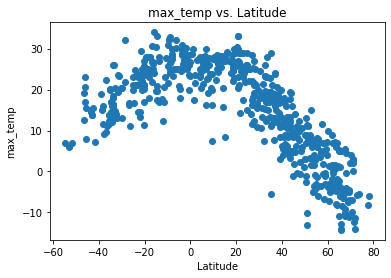

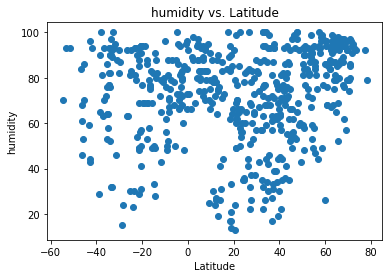

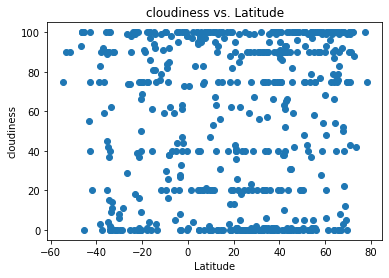

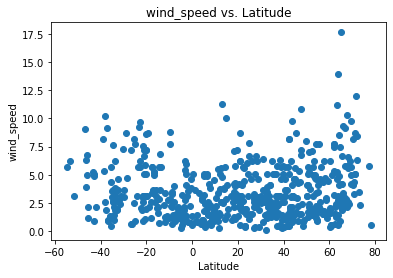

In [78]:
# use for loop to creat series of scatter plots: 
for scatter in scatter_ls:
    scatter_y = cities_cleaned_df[scatter]
    scatter_x = cities_cleaned_df['lat']
    plt.scatter(scatter_x,scatter_y)
    plt.xlabel("Latitude")
    plt.ylabel("{}".format(scatter))
    plt.title("{} vs. Latitude".format(scatter))
    plt.show()

In [ ]:
# As shown above, we can see clearly that temperature gets hotter when latitude approach the equator. 
# Temperature also gets colder as latitude gets farther away from the equator.
# Temp vs. Lat plots shows that temp is especially cold in the Northern hemisphere which makes sense because winter is coming
# Humidity, clouiness, and wind speed have not shown a clear relationship with latitude. 

Linear Regression

In [ ]:
# We know that the Northern hemisphere has latitude greater than 0 and the Southern Hemisphere is less than 0
# therefore the cleaned data can be split into two parts per latitude (>0 or <0)

In [107]:
# split data and make a linear list

northern_hemi = cities_cleaned_df[cities_cleaned_df['lat']>0]
southern_hemi = cities_cleaned_df[cities_cleaned_df['lat']<0]
linear_ls = scatter_ls

In [108]:
northern_hemi['city'].count()

397

In [109]:
southern_hemi['city'].count()

168

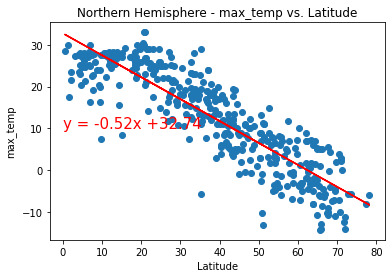

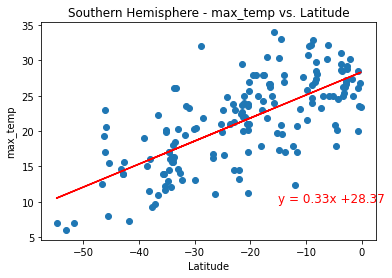

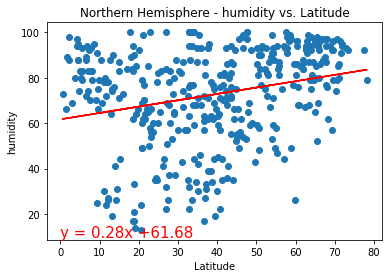

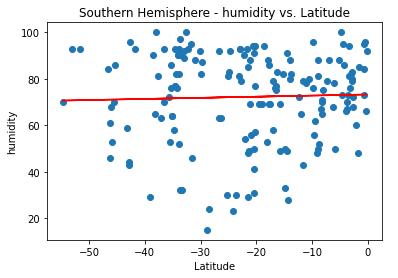

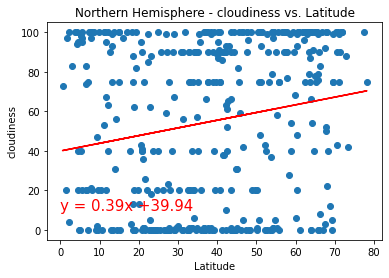

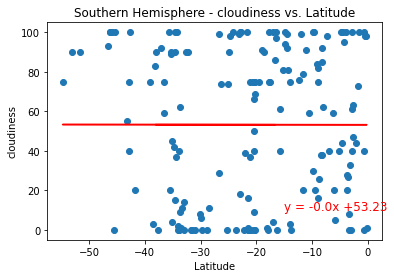

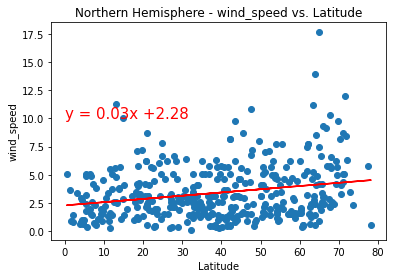

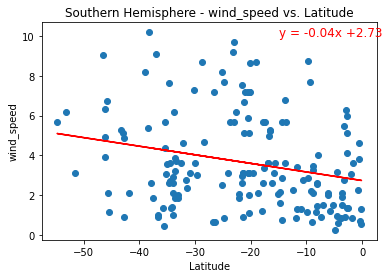

In [105]:
# for loop to creat all plots: 
for linear in linear_ls:
    
    linear_x = northern_hemi['lat']
    linear_y = northern_hemi[linear]
    
    (slope,intercept,rvalue,pvalue,stderr) = st.linregress(linear_x,linear_y)
    regress_value = linear_x * slope + intercept
    
    # get the linear equation
    line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
    
    plt.scatter(linear_x,linear_y)
    
    # linear line
    plt.plot(linear_x,regress_value,"r-")
    
    # name x and y label, title, and print the linear line 
    plt.xlabel("Latitude")
    plt.ylabel("{}".format(linear))
    plt.title("Northern Hemisphere - {} vs. Latitude".format(linear))
    plt.annotate(line_eq,(0,10),fontsize = 15, color ="red")
    plt.show()
    
    # do the same procedure for the Southern Hemisphere: 
    linear_s_x = southern_hemi['lat']
    linear_s_y = southern_hemi[linear]
    
    (slope,intercept,rvalue,pvalue,stderr) = st.linregress(linear_s_x,linear_s_y)
    regress_value_s = linear_s_x * slope + intercept
    
    line_eq_s = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
    
    plt.scatter(linear_s_x,linear_s_y)
    
    plt.plot(linear_s_x,regress_value_s,"r-")
    
    plt.xlabel("Latitude")
    plt.ylabel("{}".format(linear))
    plt.title("Southern Hemisphere - {} vs. Latitude".format(linear))
    plt.annotate(line_eq_s,(-15,10),fontsize = 12, color ="red")
    plt.show()

In [ ]:
# Observations per linear regression plots above: 
# Northern Hemisphere - Max Temp vs. Latitude --> shows a strong pattern than when latitude increases, temperature decreases
# Southern Hemisphere - Max Temp vs. Latitude --> shows a tendency that when latitude increases, temperature increases
# First two plots once again proved that as latitude gets closer to the equator, the temperature is more likely to get hotter
# Humidity (%) vs. Latitude --> both Northern and Southern plots didn't show a strong linear relationship between humidity and latitude
# Cloudiness (%) vs. Latitude --> both Northern and Southern plots didn't show a strong linear relationship between Cloudiness and latitude
# Northern Hemisphere - Wind Speed (mph) vs. Latitude --> shows a weak pattern that when latitude increases, wind speed increases
# Southern Hemisphere - Wind Speed (mph) vs. Latitude --> shows a very weak or no relationship between latitude and wind speed, but note that the sample size is a lot smaller than the Northern hemisphere data size.
# Therefore the 'Southern Hemisphere - Wind Speed (mph) vs. Latitude' plot may need larger sample data to strengthen the relationship.

In [ ]:
# export my Data into CSV file: 

In [106]:
cities_cleaned_df.to_csv(r'./cities.csv',index = False, header = True)